### In following script, I uploaded the catalogue from Excel. This catalogue has been created by ZMAP and then transformed into xlsx format

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
a=pd.read_excel(r"C:\\Users\Ogeid99\Desktop\cataloguess\lat_long_declust_magn_greaterthan3.xlsx",sep='|',header=None)
a.rename(columns={1:'Latitude',0:'Longitude', 4:'Depth/Km', 3:'Magnitude', 5:'MagType', 2:'Time'}, inplace=True)
a

,Longitude,Latitude,Time,Magnitude,Depth/Km,MagType
0,717400000000000,461580000000000,'1985-01-04T16:57:40.240000',380000000000000,1.000000e+01,'M'
1,664100000000000,453380000000000,'1985-01-04T23:59:54.820000',370000000000000,5.000000e+00,'M'
2,662700000000000,454090000000000,'1985-01-05T03:47:03.640000',320000000000000,1.000000e+01,'M'
3,167650000000000,392910000000000,'1985-01-06T17:22:58.540000',3,5.000000e+00,'Md'
4,127300000000000,432250000000000,'1985-01-07T00:34:49.290000',3,1.000000e+01,'Md'
...,...,...,...,...,...,...
7717,146098000000000,377413000000000,'2020-04-25T00:40:02.630000',320000000000000,2.600000e+01,'ML'
7718,146175000000000,377523000000000,'2020-04-25T07:21:54.480000',340000000000000,2.350000e+14,'ML'
7719,141516700000000,408285000000000,'2020-04-26T02:59:02.450000',310000000000000,2.500000e+14,'Md'
7720,136060000000000,384052000000000,'2020-04-28T05:57:28.820000',310000000000000,2.540000e+14,'ML'


### DATA CLEANSING

In [2]:
#data cleaning
from datetime import datetime
time_plot=a['Time']
function=lambda x: x.replace("'","") #replace "'" with ' '
datetime_object = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
split_object=lambda i: i.replace("T"," ") #for i in time_plot
time_plot=time_plot.map(function)
time_plot=time_plot.map(split_object)
time_plot=time_plot.map(datetime_object)
#time_plot=time_plot.to_datetime() #.astype(np.datetime64) 
a['Time']=time_plot
list_magn=[]
mag=a['Magnitude']
long=a['Longitude']
list_long=[]
Lat=a['Latitude']
Lat=[i/10000000000000 for i in Lat]
for j in mag:
    if j >20:
        j=j/100000000000000
        list_magn.append(j)
    else:
        j=float(str(j))
        list_magn.append(j)
for k in long:
    k=k/10000000000000
    if k <40.0:
        list_long.append(k)
    else:
        k=k/10
        list_long.append(k)
a['Magnitude']=list_magn
a['Longitude']=list_long
a['Latitude']=Lat
a

,Longitude,Latitude,Time,Magnitude,Depth/Km,MagType
0,7.17400,46.1580,1985-01-04 16:57:40.240,3.8,1.000000e+01,'M'
1,6.64100,45.3380,1985-01-04 23:59:54.820,3.7,5.000000e+00,'M'
2,6.62700,45.4090,1985-01-05 03:47:03.640,3.2,1.000000e+01,'M'
3,16.76500,39.2910,1985-01-06 17:22:58.540,3.0,5.000000e+00,'Md'
4,12.73000,43.2250,1985-01-07 00:34:49.290,3.0,1.000000e+01,'Md'
...,...,...,...,...,...,...
7717,14.60980,37.7413,2020-04-25 00:40:02.630,3.2,2.600000e+01,'ML'
7718,14.61750,37.7523,2020-04-25 07:21:54.480,3.4,2.350000e+14,'ML'
7719,14.15167,40.8285,2020-04-26 02:59:02.450,3.1,2.500000e+14,'Md'
7720,13.60600,38.4052,2020-04-28 05:57:28.820,3.1,2.540000e+14,'ML'


In [3]:
df=a
a['Time']

0      1985-01-04 16:57:40.240
1      1985-01-04 23:59:54.820
2      1985-01-05 03:47:03.640
3      1985-01-06 17:22:58.540
4      1985-01-07 00:34:49.290
                 ...          
7717   2020-04-25 00:40:02.630
7718   2020-04-25 07:21:54.480
7719   2020-04-26 02:59:02.450
7720   2020-04-28 05:57:28.820
7721   2020-04-28 07:14:45.750
Name: Time, Length: 7722, dtype: datetime64[ns]

### Don't take into consideration the following scripts since I did not use any formal statistical test, but 'my own' statistical test. 
#### Surprisingly, the results are not totally different from the formal ones

In [5]:
import datetime
a=df[(df['Magnitude']>3.1)& (df['Time']>datetime.datetime(1985,1,1,1,1))& (df['Time']<datetime.datetime(2020,4,1,1,1,1))]

starting_time1=a['Time'].iloc[0]
end_time1=a['Time'].iloc[len(a.index)-1]
diff_time=int((((((end_time1-starting_time1).total_seconds())))-3600*24*365*10)/(3600*24*10))
events_interval=[]
diff_value=[]
for i in range(len(a.index)):
    diff=(a['Time'].iloc[i]-starting_time1).total_seconds()
    diff_value.append(diff)
a['Diff_time']=diff_value
cnt=0
while cnt <=diff_time:  #890
    condition=a[(a['Diff_time']>=(864000*cnt))&(a['Diff_time']<(315360000+(864000*cnt)))].loc[:,'Diff_time']
    condition1=condition.to_list()
    events_interval.append(condition1)
    cnt+=1
number_time=pd.DataFrame(events_interval)
number_time_count=number_time.count(axis=1)
import random
nt=number_time_count.to_numpy()
chi=[]
p_val=[]
for i in range(1000):
    random.shuffle(nt)
    #nt_reshape=np.reshape(nt,(len(nt),1))
    nt_choice=[np.random.choice(nt) for u in range(2)]
    from statistics import mean 
    from scipy.stats import chisquare, chi2_contingency
    s=np.random.poisson(np.mean(nt),len(nt_choice))
    #chi2_contingency(number_time_count,s)
    nt_choice.sort()
    s.sort()
    test,d=chisquare(nt_choice,s)
    chi.append(test)
mean(chi)

C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


6.540945161165595

In [57]:
nt

array([424, 386, 359, 331, 356, 432, 372, 371, 421, 389, 417, 380, 438,
       371, 387, 387, 414, 372, 369, 369, 357, 382, 405, 324, 417, 359,
       368, 374, 341, 356, 323, 371, 387, 402, 390, 372, 401, 336, 384,
       397, 395, 327, 356, 384, 407, 396, 341, 432, 362, 363, 365, 385,
       384, 364, 363, 369, 350, 438, 389, 349, 376, 372, 426, 375, 398,
       375, 401, 400, 366, 345, 381, 391, 427, 398, 343, 337, 355, 373,
       373, 325, 376, 388, 366, 386, 342, 369, 429, 371, 336, 406, 353,
       415, 435, 437, 396, 331, 391, 389, 416, 383, 331, 374, 382, 368,
       372, 386, 340, 426, 338, 395, 329, 407, 380, 385, 368, 402, 403,
       345, 375, 387, 394, 391, 395, 405, 385, 344, 346, 376, 372, 426,
       393, 346, 365, 402, 369, 373, 370, 344, 325, 393, 372, 374, 372,
       371, 337, 397, 403, 334, 430, 373, 325, 339, 384, 407, 364, 342,
       372, 368, 382, 384, 405, 386, 369, 381, 412, 385, 388, 389, 395,
       372, 403, 410, 369, 384, 426, 387, 392, 392, 394, 371, 40

(array([ 72.,  31.,   9.,  52.,  59.,  47.,   6.,  15.,  18.,  40.,  25.,
         55., 107.,  88.,  33.,  83.,  58.,  45.,  16.,  21.,   8.,  22.]),
 array([13.        , 14.13636364, 15.27272727, 16.40909091, 17.54545455,
        18.68181818, 19.81818182, 20.95454545, 22.09090909, 23.22727273,
        24.36363636, 25.5       , 26.63636364, 27.77272727, 28.90909091,
        30.04545455, 31.18181818, 32.31818182, 33.45454545, 34.59090909,
        35.72727273, 36.86363636, 38.        ]),
 <a list of 22 Patch objects>)

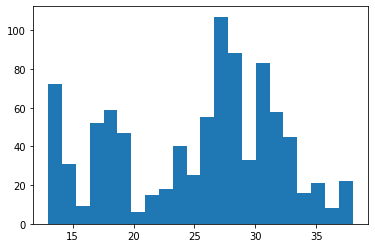

In [75]:
plt.hist(number_time_count,bins=22)


(array([  1.,   2.,   3.,  16.,  12.,  41.,  68.,  58., 134.,  68., 127.,
        126.,  51.,  83.,  33.,  47.,  21.,   8.,   4.,   1.,   4.,   2.]),
 array([ 9.        , 10.59090909, 12.18181818, 13.77272727, 15.36363636,
        16.95454545, 18.54545455, 20.13636364, 21.72727273, 23.31818182,
        24.90909091, 26.5       , 28.09090909, 29.68181818, 31.27272727,
        32.86363636, 34.45454545, 36.04545455, 37.63636364, 39.22727273,
        40.81818182, 42.40909091, 44.        ]),
 <a list of 22 Patch objects>)

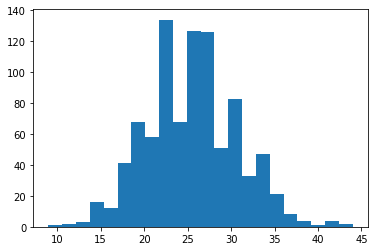

In [76]:
plt.hist(np.random.poisson(np.mean(nt),len(nt)),bins=22)

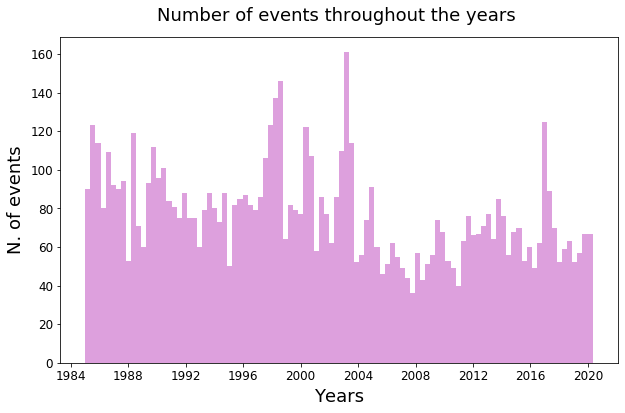

In [16]:
import matplotlib.dates as mdates
df["Time"] = df["Time"].astype("datetime64")
fig,axes=plt.subplots(1,1,figsize=(10,6))
plt.hist(df['Time'], bins=100, color='plum')
#ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel("Years",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("N. of events",fontsize=18,labelpad=5)
plt.tick_params(labelsize=12)
plt.title('Number of events throughout the years ',fontsize=18,pad=15.5)
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\Nevents_time_reasenbergdeclustering.png",dpi=600)
plt.show()

In [49]:
DATA=pd.read_csv(r"C:\\Users\Ogeid99\Desktop\cataloguess\DATA3_magn.csv")
DATA

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,199,1985-01-04T16:57:40.240000,46.1580,7.17400,10.0,BULLETIN-VAX,NaN,NaN,NaN,M,3.8,--,Confine Italia-Svizzera (SVIZZERA)
1,229,1985-01-04T23:59:54.820000,45.3380,6.64100,5.0,BULLETIN-VAX,NaN,NaN,NaN,M,3.7,--,Confine Italia-Francia (FRANCIA)
2,239,1985-01-05T03:47:03.640000,45.4090,6.62700,10.0,BULLETIN-VAX,NaN,NaN,NaN,M,3.2,--,Confine Italia-Francia (FRANCIA)
3,489,1985-01-06T17:22:58.540000,39.2910,16.76500,5.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.0,--,2 km N Castelsilano (KR)
4,529,1985-01-07T00:34:49.290000,43.2250,12.73000,10.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.0,--,5 km W Gualdo Tadino (PG)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11189,24313381,2020-04-25T07:21:54.480000,37.7523,14.61750,23.5,BULLETIN-INGV,NaN,NaN,NaN,ML,3.4,--,4 km SE Troina (EN)
11190,24317311,2020-04-26T02:59:02.450000,40.8285,14.15167,2.5,SURVEY-INGV-OV,NaN,NaN,NaN,Md,3.1,--,5 km E Pozzuoli (NA)
11191,24326451,2020-04-28T05:57:28.820000,38.4052,13.60600,25.4,SURVEY-INGV,NaN,NaN,NaN,ML,3.1,--,Costa Siciliana centro-settentrionale (Palermo)
11192,24326871,2020-04-28T07:14:45.750000,38.5943,14.17220,27.5,SURVEY-INGV,NaN,NaN,NaN,ML,3.0,--,Tirreno Meridionale (MARE)


In [50]:
import datetime
df=DATA
datetime_object = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')
split_object=lambda i: i.replace("T"," ") #for i in time_plot
df['Time']=df['Time'].map(split_object)
df['Time']=df['Time'].map(datetime_object)


In [63]:
a=df[(df['Magnitude']>4.9)& (df['Time']>datetime.datetime(1985,1,1,1,1))& (df['Time']<datetime.datetime(2020,4,1,1,1,1))]

starting_time1=a['Time'].iloc[0]
end_time1=a['Time'].iloc[len(a.index)-1]
diff_time=int((((((end_time1-starting_time1).total_seconds())))-3600*24*365*10)/(3600*24*10))
events_interval=[]
diff_value=[]
for i in range(len(a.index)):
    diff=(a['Time'].iloc[i]-starting_time1).total_seconds()
    diff_value.append(diff)
a['Diff_time']=diff_value
cnt=0
while cnt <diff_time:  #890
    condition=a[(a['Diff_time']>=(864000*cnt))&(a['Diff_time']<(315360000+(864000*cnt)))].loc[:,'Diff_time']
    condition1=condition.to_list()
    events_interval.append(condition1)
    cnt+=1
number_time=pd.DataFrame(events_interval)
number_time_count=number_time.count(axis=1)
import random
nt=number_time_count.to_numpy()
chi=[]
p_val=[]
for i in range(1000):
    random.shuffle(nt)
    #nt_reshape=np.reshape(nt,(len(nt),1))
    nt_choice=[np.random.choice(nt) for u in range(31)]
    from statistics import mean 
    from scipy.stats import chisquare, chi2_contingency 
    s=np.random.poisson(np.mean(nt),len(nt_choice))
    nt_choice.sort()
    s.sort()
    #chi2_contingency(number_time_count,s)
    test,d=chisquare(nt_choice,s)
    chi.append(test)
mean(chi)

C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


14.990212385461518